# Ames Housing Notebook: 03C - Lasso Model
***
### Importing basline packages as well as scikit learn - linear_model, model_selection, metrics, and pre-processing packages

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### Reading in the polynomials csv I created at the end of the 03A_MLR_Model notebook 

In [286]:
poly_df = pd.read_csv('../datasets/polynomials_df.csv', index_col = [0])

### Creating features matrix (X) and target vector (y)

In [287]:
X = poly_df.drop('saleprice_x', axis=1)
y = poly_df['saleprice_x']

### Instantiating PolynomialFeatures object to create all two-way terms.

In [288]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

### Fitting and transforming the X data.

In [289]:
# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

### Examining the dimensions of X_overfit

In [290]:
# Check out the dimensions of X_overfit.
X_overfit.shape

(2049, 324)

### Creating the Train Test Split Function

In [291]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.3,
    random_state=42
)

### Printing the shapes of X_train, y_train, X_test, and y_test

In [292]:
print(f'X_train shape is: {X_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'X_test shape is: {X_test.shape}')
print(f'y_test shape is: {y_test.shape}')

X_train shape is: (1434, 324)
y_train shape is: (1434,)
X_test shape is: (615, 324)
y_test shape is: (615,)


### Instantiating Standard Scaler

In [293]:
# Instantiate Standard Scaler.
sc = StandardScaler()

### Fitting and transforming Standard Scaler to overfit the data in one step.

In [294]:
# Fit AND transform Standard Scaler to overfit data in one step.
# Z_overfit_train = pd.DataFrame(ss_overfit.fit_transform(X_overfit_train))
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

### Setting up a list of Lasso alphas and fitting the model to the best lasso alpha

In [295]:
# Set up a list of Lasso alphas to check.
alphas_lasso = np.logspace(2, 4, 12)
# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(
    alphas=alphas_lasso,
    cv=5
)
# Fit model using best lasso alpha!
lasso_cv.fit(Z_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837472694.1359253, tolerance: 723897159.8156364
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 722554939.7357178, tolerance: 678416180.9639719
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 776884349.5107422, tolerance: 663672475.2973784
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might wa

LassoCV(alphas=array([  100.        ,   151.9911083 ,   231.01297001,   351.11917342,
         533.66992312,   811.13083079,  1232.84673944,  1873.81742286,
        2848.03586844,  4328.76128108,  6579.33224658, 10000.        ]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [296]:
# Here is the optimal value of alpha
lasso_cv.alpha_

151.99110829529332

### Above is the optimal lasso_cv alpha
***
### Testing R2 scores for train and test lasso models

In [297]:
train_lasso_r2 = lasso_cv.score(Z_train, y_train)
train_lasso_r2

0.9255793996637314

In [298]:
test_lasso_r2 = lasso_cv.score(Z_test, y_test)
test_lasso_r2

0.925825529745825

### Train and test are nearly identical, similar to the ridge model.  Our model is fit very nicely with a higher R2 score
***
### Calculating RMSE for train and test lasso models

In [299]:
predict_lasso_train = lasso_cv.predict(Z_train)

In [300]:
predict_lasso_test = lasso_cv.predict(Z_test)

In [301]:
train_lasso_rmse = np.sqrt(mean_squared_error(y_train, predict_lasso_train))
train_lasso_rmse

21294.2647672121

In [302]:
test_lasso_rmse = np.sqrt(mean_squared_error(y_test, predict_lasso_test))
test_lasso_rmse

22302.01816013792

### The RMSE has dropped about 7-8000 points compared to our MLR models
***
### Taking a peak at the lasso_cv coefficients to see how many are 0'd out

In [303]:
lasso_cv.coef_

array([-1.16989333e+04,  0.00000000e+00, -0.00000000e+00, -2.84612834e+03,
       -0.00000000e+00, -0.00000000e+00,  3.91654430e+02,  0.00000000e+00,
       -2.17940865e+03,  0.00000000e+00, -8.54333017e+03, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.23454857e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.97112075e+02,  1.90991146e+04,  3.32227602e+03,  6.45663630e+03,
        3.94197169e+04,  7.94406776e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  5.35637318e+03,
        4.16479055e+03,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.26015226e+03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

### Many coeffecients have been made into 0.  Those that remain form the best combination of coefficients to  achieve the highest train/test scores with relatively equal values.
***
### Plotting predicted vs. actual y values of the Lasso Model

In [304]:
y_preds_lasso = lasso_cv.predict(Z_test)

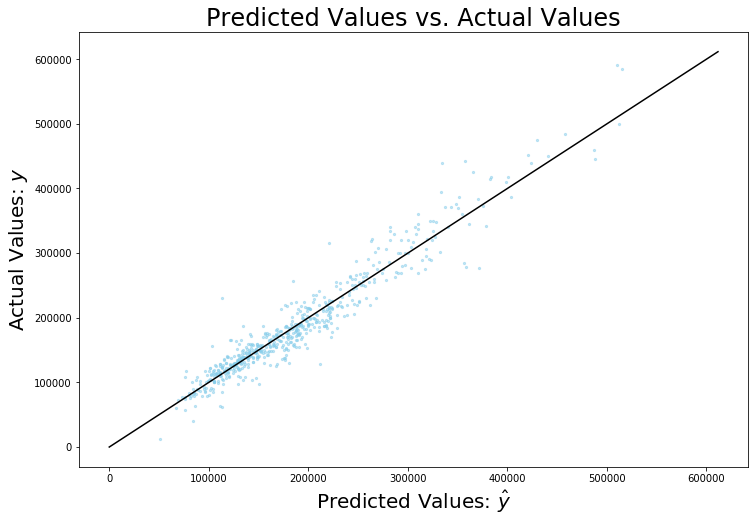

In [305]:
# Plot the model
plt.figure(figsize=(12,8))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_preds_lasso, y_test, s=5, color='skyblue', alpha = 0.5)

# Plot a line.
plt.plot([0, np.max(y)],
         [0, np.max(y)],
         color = 'black')

# Tweak title and axis labels.
plt.xlabel("Predicted Values: $\hat{y}$", fontsize = 20)
plt.ylabel("Actual Values: $y$", fontsize = 20)
plt.title('Predicted Values vs. Actual Values', fontsize = 24);

### This plot looks very similar to the one for the Ridge model.  The distribution is quite linear even at higher sale prices.  Very happy with the results of the Lasso Model.
***
### Adding the results of the Lasso model to the model_comparisons table

In [306]:
table = pd.read_csv('../datasets/model_comparisons_table.csv', index_col = [0])
table = table.drop('lasso_model', axis=1)
table

,minimum_features_MLR,full_features_MLR,log_full_features_MLR,ridge_model
train R2,0.864981,0.869081,0.890478,0.926639
test R2,0.871427,0.880378,0.907109,0.928647
train_RMSE,29676.976985,29222.926156,197099.326506,21142.187458
test RMSE,26739.762753,25792.144480,191468.597492,21873.744177


In [307]:
table['lasso_model'] = [train_lasso_r2, test_lasso_r2, train_lasso_rmse, test_lasso_rmse]
table

,minimum_features_MLR,full_features_MLR,log_full_features_MLR,ridge_model,lasso_model
train R2,0.864981,0.869081,0.890478,0.926639,0.925579
test R2,0.871427,0.880378,0.907109,0.928647,0.925826
train_RMSE,29676.976985,29222.926156,197099.326506,21142.187458,21294.264767
test RMSE,26739.762753,25792.144480,191468.597492,21873.744177,22302.018160


### Above is the completed table displaying all 5 models that I tested
***
### Saving the complete table to csv

In [308]:
table.to_csv('../datasets/model_comparisons_table.csv')